# 5. Random Forest Regressor – popularity

Modelo para predecir la popularidad real.

Predice la popularidad de canciones populares utilizando un conjunto de árboles. Detecta relaciones complejas entre las variables musicales y el éxito de una canción.

Evaluación del modelo Random Forest Regressor:
MAE:  10.63
RMSE: 14.08
R²:   0.48
Imagen guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\random_forest_regresion_predicciones.png


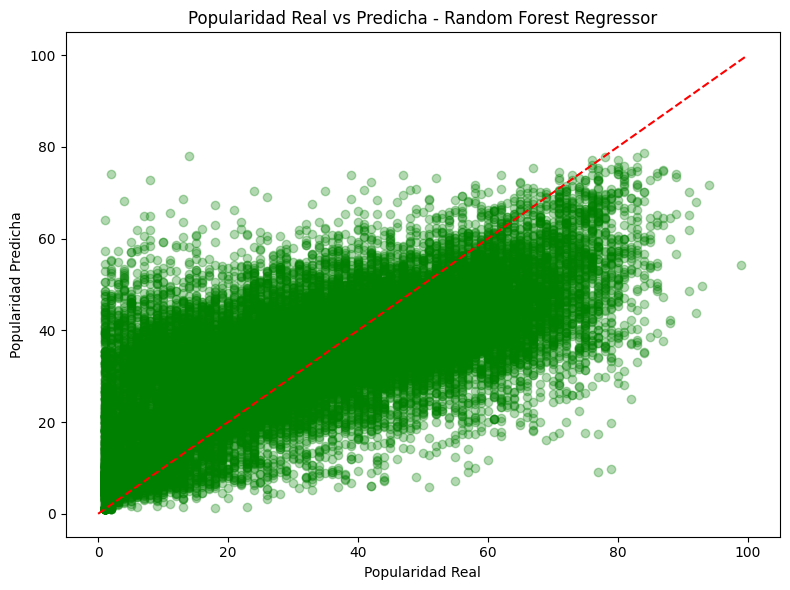

Modelo guardado en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\models\modelo_random_forest_regresor.pkl


In [1]:
# 1. Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import numpy as np

# 2. Cargar la base
file_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\data\tracks_limpio_con_low_popularity.csv"
df = pd.read_csv(file_path)

# 3. Filtrar canciones con low_popularity = 0 (populares)
df_populares = df[df["low_popularity"] == 0]

# 4. Selección de variables
features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "valence", "tempo",
    "duration_ms", "explicit", "release_year"
]
target = "popularity"

X = df_populares[features]
y = df_populares[target]

# 5. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Entrenar el modelo
modelo_rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf_reg.fit(X_train, y_train)

# 7. Predicciones y evaluación
y_pred = modelo_rf_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo Random Forest Regressor:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

# 8. Gráfico de predicción vs real
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='green')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.title("Popularidad Real vs Predicha - Random Forest Regressor")
plt.xlabel("Popularidad Real")
plt.ylabel("Popularidad Predicha")
plt.tight_layout()

# Guardar imagen
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\random_forest_regresion_predicciones.png"
plt.savefig(img_path, dpi=300)
print(f"Imagen guardada en: {img_path}")
plt.show()

# 9. Guardar el modelo
modelo_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\models\modelo_random_forest_regresor.pkl"
joblib.dump(modelo_rf_reg, modelo_path)
print(f"Modelo guardado en: {modelo_path}")
